In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)

# Preprocessing

In [2]:
# setting the dataframes

raw_housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
raw_realty = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)
raw_housing.shape

/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_97282/4020161191.py:4: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_realty = pd.read_csv('./data/Ames_Real_Estate_Data.csv', index_col=0)


(2580, 80)

### Cleaning up raw data

In [3]:
housing = raw_housing.reset_index()
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


### Dealing with missing values

In [4]:
# lets start by cleaning up the data with missing values. 
# not all missing values are expected to be "non-existent"

cols = housing.columns[housing.isna().any()].to_list()
print(cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
# lets separate all of these to groups to make it easier to investigate

Basement = []
Garage = []
Outdoor = []
Other = []

for col in cols:
    if 'Bsmt' in col:
        Basement.append(col)
    elif 'Garage' in col:
        Garage.append(col)
    elif col in ['Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'MasVnrArea']:
        Outdoor.append(col)
    else:
        Other.append(col)
        
print(Basement)
print(Garage)
print(Outdoor)
print(Other)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
['MasVnrType', 'MasVnrArea', 'FireplaceQu', 'PoolQC', 'Fence']
['LotFrontage', 'Alley', 'Electrical', 'MiscFeature']


##### Basement

In [6]:
# lets first create some dictionaries

Exposure = {'NA': 0, 'No': 1, 'Mn': 2, 'Gd': 3, 'Av': 4}
FinType = {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
QualCond = {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

GarFin = {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
FenceQual = {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

In [7]:
# lets start by looking at the null in total basement SF

housing[housing['TotalBsmtSF'].isna()] 
# looks like all of these have NaN in the basement type. 
# lets change these values to 0

housing['TotalBsmtSF'].fillna(0, inplace=True)
    
# additionally, lets have all observations = 0 if the total SF == 0
for col in housing[Basement].drop('TotalBsmtSF', axis=1).columns.tolist():
    housing[col] = housing[col].mask(housing['TotalBsmtSF'] == 0, 'NA')
    
    
# lets investigate the other missing values

# BsmtExposure has 2 missing values still, but those values have good basement quality
# lets fill those with the most common, which is 'No'
housing['BsmtExposure'].fillna('No', inplace = True)

# BsmtFinType2 has 1 missing value, but basement quality is good
# lets fill those with the most common, which is 'Unf'
housing['BsmtFinType2'].fillna('Unf', inplace = True)

# now we can apply formulas to the ordinal rows
housing['BsmtExposure'] = housing['BsmtExposure'].apply(lambda row: Exposure[row])
housing['BsmtFinType1'] = housing['BsmtFinType1'].apply(lambda row: FinType[row])
housing['BsmtFinType2'] = housing['BsmtFinType2'].apply(lambda row: FinType[row])
housing['BsmtQual'] = housing['BsmtQual'].apply(lambda row: QualCond[row])
housing['BsmtCond'] = housing['BsmtCond'].apply(lambda row: QualCond[row])
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].apply(lambda row: 0 if row == 'NA' else row)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].apply(lambda row: 0 if row == 'NA' else row)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].apply(lambda row: 0 if row == 'NA' else row)
housing['BsmtFullBath'] = housing['BsmtFullBath'].apply(lambda row: 0 if row == 'NA' else row)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].apply(lambda row: 0 if row == 'NA' else row)

# and take a look at our partial df
housing[Basement]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,3,3,1,3,238.0,1,0.0,618.0,856.0,1.0,0.0
1,4,3,2,6,552.0,5,393.0,104.0,1049.0,1.0,0.0
2,3,3,1,5,737.0,1,0.0,100.0,837.0,0.0,0.0
3,2,3,1,1,0.0,1,0.0,405.0,405.0,0.0,0.0
4,4,3,1,6,643.0,1,0.0,167.0,810.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2575,3,3,1,1,0.0,1,0.0,952.0,952.0,0.0,0.0
2576,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2577,3,3,1,4,284.0,1,0.0,717.0,1001.0,0.0,0.0
2578,4,3,1,6,841.0,1,0.0,144.0,985.0,1.0,0.0


##### Garage

In [8]:
# lets start by filling the null values in GarageArea to 0

housing['GarageArea'].fillna(0, inplace=True)

# lets fill missing GarageType values with 'NoGarage'
# as this is nominal, we'll dummify later
housing['GarageType'].fillna('NoGarage', inplace=True)

# now we can replace NaN values for observations without a garage

housing['GarageQual'].fillna('NA', inplace = True)
housing['GarageCond'].fillna('NA', inplace = True)
housing['GarageFinish'].fillna('NA', inplace = True)

# investigating missing values in columns WITH a garage:

# missing GarageYrBlt will be entered as the YearBuilt
housing['GarageYrBlt'] = housing['GarageYrBlt'].mask(
    housing['GarageType'] != 'NoGarage', housing['YearBuilt'])

# mising GarageCars values will be replaced to the most common: 2
housing['GarageCars'] = housing['GarageCars'].mask(
    housing['GarageType'] != 'NoGarage', 2)

# finally, we can apply a formula to the other missing values
housing['GarageQual'] = housing['GarageQual'].apply(lambda row: QualCond[row])
housing['GarageCond'] = housing['GarageCond'].apply(lambda row: QualCond[row])
housing['GarageFinish'] = housing['GarageFinish'].apply(lambda row: GarFin[row])

# we'll leave the missing GarageYrBlt values as NaN for now
housing[Garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Detchd,1939.0,1,2.0,399.0,3,3
1,Attchd,1984.0,3,2.0,266.0,3,3
2,Detchd,1930.0,1,2.0,216.0,3,1
3,Detchd,1900.0,1,2.0,281.0,3,3
4,Attchd,2001.0,3,2.0,528.0,3,3
...,...,...,...,...,...,...,...
2575,Detchd,1916.0,1,2.0,192.0,2,1
2576,Attchd,1955.0,1,2.0,452.0,3,3
2577,2Types,1949.0,1,2.0,871.0,3,3
2578,Attchd,2000.0,3,2.0,486.0,3,3


##### Outdoor

In [9]:
# lets start with MasVnrType and MasVnrArea

# lets fill na values of MasVnrArea to 0, then mask the type with 'None'
# MasVnrType is nominal, so we'll dummify this later

housing['MasVnrArea'].fillna(0, inplace=True)
housing['MasVnrType'] = housing['MasVnrType'].mask(housing['MasVnrArea'] == 0, 'None')

# we can first fill some null values
housing['FireplaceQu'].fillna('NA', inplace=True)
housing['Fence'].fillna('NA', inplace=True)

# for PoolQC, I'm going to fill to 'Po' because it doesn't have a 'Poor quality'
# that way, I can use the QualCond row and subtract by 1
housing['PoolQC'].fillna('Po', inplace=True)

# now we can apply functions
housing['FireplaceQu'] = housing['FireplaceQu'].apply(lambda row: QualCond[row])
housing['PoolQC'] = housing['PoolQC'].apply(lambda row: QualCond[row]-1)
housing['Fence'] = housing['Fence'].apply(lambda row: FenceQual[row])

housing[Outdoor]

,MasVnrType,MasVnrArea,FireplaceQu,PoolQC,Fence
0,None,0.0,4,0,0
1,BrkFace,149.0,0,0,0
2,None,0.0,0,0,0
3,None,0.0,0,0,0
4,None,0.0,0,0,0
...,...,...,...,...,...
2575,None,0.0,4,0,0
2576,None,0.0,4,0,0
2577,None,0.0,0,0,0
2578,BrkFace,144.0,3,0,0


##### Other

In [10]:
# for LotFrontage and Alley, null values are 0, so lets mask them as such

housing['LotFrontage'].fillna(0, inplace=True)
housing['Alley'].fillna(0, inplace=True)

# for electrical, theres only one missing value, so lets mask it with the most common: SBrkr
housing['Electrical'].fillna('SBrkr', inplace=True)

# for misc features, these are nominal descriptive
# lets first fill missing values, and we'll dummify it later
housing['MiscFeature'].fillna('None', inplace=True)

housing[Other]

,LotFrontage,Alley,Electrical,MiscFeature
0,0.0,0,SBrkr,None
1,42.0,0,SBrkr,None
2,60.0,0,SBrkr,None
3,80.0,0,SBrkr,None
4,70.0,0,SBrkr,None
...,...,...,...,...
2575,0.0,0,FuseF,None
2576,0.0,0,FuseA,None
2577,82.0,0,FuseA,None
2578,0.0,0,SBrkr,None


### Dealing with correlations

In [11]:
# corr = housing.copy().drop('SalePrice', axis=1)
# corr.corr()[(corr.corr() > 0.7) | (corr.corr() < -0.7)]

# Correlations:
    # - GrLivArea & TotRmsAbvGr: 0.81 >>> picking GrLivArea
    # - PoolArea & PoolQC: 0.77 >>> picking PoolArea
    # - GarageQual & GarageCond: 0.94 >>> picking GarageQual
    # - GarageCond & GarageCars: 0.92
    # - GarageQual & GarageCars: 0.93
    # - Fireplaces & FireplacesQual: 0.85 >>> pickingFireplacesQual
    # - TotalBsmtSF & 1stFlrSF: 0.78 >>> picking TotalBsmtSF
    # - BsmtFinType2 & BsmtFinSF2: 0.80 >>> picking BsmtFinSF2
    # - BsmtFinType1 & BsmtFinSF1: 0.72 >>> picking BsmtFinSF1
    # - GaragesYrBlt & YearBuilt: 1.0 >>> picking YearBuilt

/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_97282/1539574534.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(housing.corr(), dtype=np.bool))


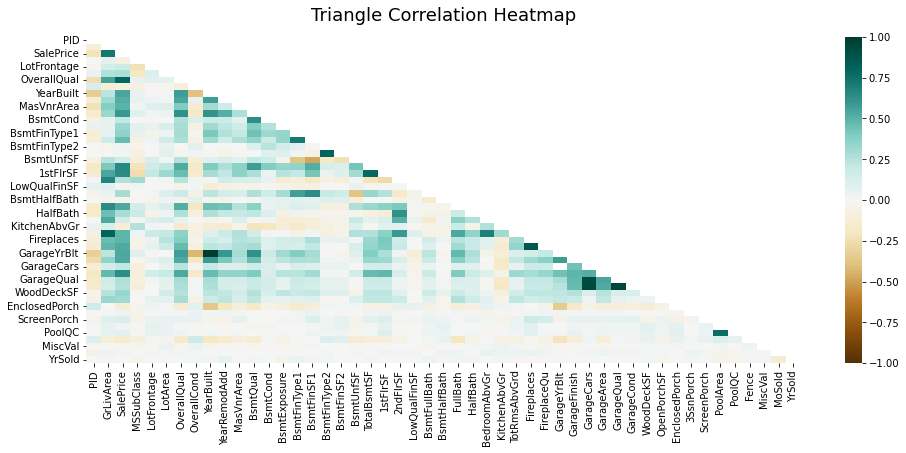

In [12]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(housing.corr(), dtype=np.bool))
heatmap = sns.heatmap(housing.corr(), mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Dealing with Categorical Columns

In [13]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,0.0,7890,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,3,3,1,3,238.0,1,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,4,Detchd,1939.0,1,2.0,399.0,3,3,Y,0,0,0,0,166,0,0,0,None,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.0,4235,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,4,3,2,6,552.0,5,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1984.0,3,2.0,266.0,3,3,Y,0,105,0,0,0,0,0,0,None,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,3,3,1,5,737.0,1,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Detchd,1930.0,1,2.0,216.0,3,1,N,154,0,42,86,0,0,0,0,None,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.0,8146,Pave,0,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,2,3,1,1,0.0,1,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,1900.0,1,2.0,281.0,3,3,N,0,0,168,0,111,0,0,0,None,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.0,8400,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,4,3,1,6,643.0,1,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,2001.0,3,2.0,528.0,3,3,Y,0,45,0,0,0,0,0,0,None,0,11,2009,WD,Normal


##### Nominal Categorical:

In [21]:
nominal_cols = ['Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 
                'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

In [22]:
dict_ = {
    'LotShape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, 
    'LandSlope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
    'ExterQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'PavedDrive': {'N': 1, 'P': 2, 'Y': 3},
    'MSZoning': {'RL': 1, 'RM': 2, 'FV': 3, 'RH': 4, 'C (all)': 5, 'I (all)': 6, 'A (agr)': 7},
    'Street': {'Pave': 1, 'Grvl': 2},
    'Alley': {'Pave'; 1, 'Grvl': 2},
    'LandContour': {'Lvl': 1, 'HLS': 2, 'Bnk': 3, 'Low': 4},
    'Utilities': {'AllPub': 1, 'NoSewr': 2},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5},
    'Neighborhood': {'NAmes': 1, 'CollgCr': 2, ''}
        }

SyntaxError: invalid syntax (2489694388.py, line 12)

In [ ]:
for i in housing[]

In [23]:
for feat in nominal_cols:
    print(housing[feat].value_counts())

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64
Norm      2228
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: Condition1, dtype: int64
Norm      2555
Feedr       12
PosN         3
Artery       3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
1Fam      2139
TwnhsE     202
Twnhs       98
Duplex      87
2fmCon      54
Name: BldgType, dtype: int64
1Story    1288
2Story     773
1.5Fin     284
SLvl       118
SFoyer      70
2.5Unf      22
1.5Unf      19
2.5Fin       6
Name: 

In [15]:
# lets make a function to make it easier to dummify specific features

def dummify(features):
    
    '''
    Dummify features, remove the highest value count
    Features are of type list
    '''
    
    for feature in features:
        
        # create the dummified dataframe
        value_to_drop = housing[feature].value_counts().index[0]
        globals()[feature] = pd.get_dummies(housing[feature], prefix=feature)
        globals()[feature].drop(f'{feature}_{value_to_drop}', axis=1, inplace=True)
        
        # merge the dataframes together
        try:
            df = df.merge(globals()[feature], left_index=True, right_index=True)
        except:
            df = globals()[feature]
            
    return df

In [16]:
dummify(nominal_cols)

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,

##### Ordinal Categorical

In [17]:
ordinal_cols = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 
                'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 
                'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence']

In [18]:
# let's do the same thing for the ordinal cols

def ordinal(features):
    '''
    changes ordinal values to ranked numbers
    '''
    
    dicts = {'LotShape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, 
             'LandSlope': {'Sev': 1, 'Mod': 2, 'Gtl': 3},
             'ExterQual': {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
             'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
             'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
             'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
             'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
             'PavedDrive': {'N': 1, 'P': 2, 'Y': 3}}
    
    for feature in features:
        try: 
            housing[feature] = housing[feature].apply(lambda row: dicts[feature][row])
        except:
            pass
        
    return housing[features]

In [19]:
ordinal(ordinal_cols)

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence
0,4,3,6,6,2,3,3,3,1,3,1.0,0.0,1,0,2,1,3,8,4,1,3,3,0
1,4,3,5,5,3,3,4,3,2,3,1.0,0.0,2,0,2,1,4,8,0,3,3,3,0
2,4,3,5,9,3,3,3,3,1,5,0.0,0.0,1,0,2,1,4,8,0,1,3,1,0
3,4,3,4,8,3,4,2,3,1,4,0.0,0.0,1,0,2,1,3,8,0,1,3,1,0
4,4,3,8,6,3,3,4,3,1,5,1.0,0.0,2,1,3,1,4,8,0,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,4,3,6,6,2,3,3,3,1,2,0.0,0.0,1,0,2,1,2,8,4,1,2,2,0
2576,3,3,3,5,2,3,0,0,0,5,0.0,0.0,2,0,4,1,3,6,4,1,3,3,0
2577,4,3,5,6,2,3,3,3,1,3,0.0,0.0,2,0,4,2,3,8,0,1,3,3,0
2578,4,3,7,5,3,3,4,3,1,5,1.0,0.0,2,1,3,1,4,8,3,3,3,3,0


##### Continuous Variables

In [20]:
continuous_cols = ['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt', 
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                   'TotalBsmtSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']

In [21]:
df = pd.read_csv('./data/cleaned_housing.csv')
features = housing[[*ordinal_cols, *continuous_cols]].drop(
    'SalePrice', axis=1).merge(dummify(nominal_cols), left_index=True, right_index=True)

features = features.merge(df[['crime_rate', 'school_quality']], 
                          left_index=True, right_index=True).fillna(0)

In [22]:
features['HouseAge'] = features['YrSold'] - features['YearBuilt']
features['LastRemod'] = features['YrSold'] - features['YearRemodAdd']

In [24]:
features.to_csv('./data/features_dummified_213col.csv')
features

,LotShape,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,PavedDrive,Fence,GrLivArea,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_A (agr),MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,Utilities_NoSewr,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_BrkTil,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial,crime_rate,school_quality,HouseAge,LastRemod
0,4,3,6,6,2,3,3,3,1,3,1.0,0.0,1,0,2,1,3,8,4,1,3,3,0,856,0.0,7890,1939,1950,0.0,238.0,0.0,618.0,856.0,0,399.0,0,0,0,0,166,0,3,2010,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,71,60
1,4,3,5,5,3,3,4,3,2,3,1.0,0.0,2,0,2,1,4,8,0,3,3,3,0,1049,42.0,4235,1984,1984,149.0,552.0,393.0,104.0,1049.0,0,266.0,0,105,0,0,0,0,2,200